# Retail Store Location Scrapper

## Cafe Coffee Day locations - delhi

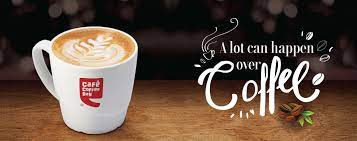

In [1]:
# import libraries
import requests
import json
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap,FastMarkerCluster
from datetime import datetime

In [2]:
# Location Scrapper
# url of the website where store locations data will be scrape
# here i have cafe coffee day as my favourite retail brand in india
url = 'https://www.cafecoffeeday.com/store-locator/delhi/'

# requesting http and storing the response in a variable 'r'
r = requests.get(url)

# checking the status for the response object (200 is ok, 404 is not found)
print(r.status_code)

# parse the html content of the response using BeautifulSoup and storing the resulting object in a variable 'soup'
soup = BeautifulSoup(r.content,'html.parser')

# checking if we getting the write html content
print(soup.title.text)

# The data we need is in script element that contains scripting statements 
# and the data is in JSON (objects literals contains key/value pairs) 
script = soup.find_all('script')[11].text.strip()[30:-277]

# print the key value pairs data
print(script)

200
CCD outlets/restaurants in Delhi - Café Coffee Day
{"locationTitle":"Delhi","locations":[{"val":"12403","name":"Caf\u00e9 Coffee Day - Rajouri Garden","address1":"Building No 13\/57, J Block\r\n Rajouri Garden\r\n","latitude":"28.6397488","longitude":"77.1181652","city":"Delhi","state":"Delhi","pincode":"110027","phone":"1800 102 5093","storeUrl":"https:\/\/www.cafecoffeeday.com\/store-locator\/delhi\/delhi-4","near":"0","veg":"","city_area":"","highway":"0","two4":"0","type":"Cafe Coffee Day","wifi":"1","open_time":"9:00","close_time":"9:30"},{"val":"12401","name":"Caf\u00e9 Coffee Day - Vishal Enclave","address1":"24\r\n Block A, Vishal Enclave, Rajouri Garden\r\n","latitude":"28.6489842","longitude":"77.12184","city":"Delhi","state":"Delhi","pincode":"110027","phone":"1800 102 5093","storeUrl":"https:\/\/www.cafecoffeeday.com\/store-locator\/delhi\/delhi-3","near":"0","veg":"","city_area":"","highway":"0","two4":"0","type":"Cafe Coffee Day","wifi":"1","open_time":"10:00","close_

In [3]:
data = json.loads(script)

In [4]:
# we don't need the first element from data (locationTitle)
ccd = data['locations']

In [5]:
print(ccd)

[{'val': '12403', 'name': 'Café Coffee Day - Rajouri Garden', 'address1': 'Building No 13/57, J Block\r\n Rajouri Garden\r\n', 'latitude': '28.6397488', 'longitude': '77.1181652', 'city': 'Delhi', 'state': 'Delhi', 'pincode': '110027', 'phone': '1800 102 5093', 'storeUrl': 'https://www.cafecoffeeday.com/store-locator/delhi/delhi-4', 'near': '0', 'veg': '', 'city_area': '', 'highway': '0', 'two4': '0', 'type': 'Cafe Coffee Day', 'wifi': '1', 'open_time': '9:00', 'close_time': '9:30'}, {'val': '12401', 'name': 'Café Coffee Day - Vishal Enclave', 'address1': '24\r\n Block A, Vishal Enclave, Rajouri Garden\r\n', 'latitude': '28.6489842', 'longitude': '77.12184', 'city': 'Delhi', 'state': 'Delhi', 'pincode': '110027', 'phone': '1800 102 5093', 'storeUrl': 'https://www.cafecoffeeday.com/store-locator/delhi/delhi-3', 'near': '0', 'veg': '', 'city_area': '', 'highway': '0', 'two4': '0', 'type': 'Cafe Coffee Day', 'wifi': '1', 'open_time': '10:00', 'close_time': '09:30'}, {'val': '12396', 'name

In [6]:
# converting ccd into dataframe , so we can perform data cleaning and dave it in a csv format

ccd = pd.DataFrame(ccd)

In [7]:
ccd.head()

,val,name,address1,latitude,longitude,city,state,pincode,phone,storeUrl,near,veg,city_area,highway,two4,type,wifi,open_time,close_time
0,12403,Café Coffee Day - Rajouri Garden,"Building No 13/57, J Block\r\n Rajouri Garden\r\n",28.6397488,77.1181652,Delhi,Delhi,110027,1800 102 5093,https://www.cafecoffeeday.com/store-locator/de...,0,,,0,0,Cafe Coffee Day,1,9:00,9:30
1,12401,Café Coffee Day - Vishal Enclave,"24\r\n Block A, Vishal Enclave, Rajouri Garden...",28.6489842,77.12184,Delhi,Delhi,110027,1800 102 5093,https://www.cafecoffeeday.com/store-locator/de...,0,,,0,0,Cafe Coffee Day,1,10:00,09:30
2,12396,Café Coffee Day - Janakpuri,"Block B 2B/14, Janakpuri\r\n",28.63344,77.94284,Delhi,Delhi,110058,1800 102 5093,https://www.cafecoffeeday.com/store-locator/de...,0,,,0,0,Cafe Coffee Day,1,09:00,11:00
3,12394,Café Coffee Day - Mandi House,"Shop No 49, Plot 7, Block 205 C, Tansen Marg\r...",28.6294921,77.232787,New delhi,Delhi,110001,1800 102 5093,https://www.cafecoffeeday.com/store-locator/de...,0,,,0,0,Cafe Coffee Day,1,9:00,10:00
4,12390,Café Coffee Day - Lajpath Nagar,"A-10, Lajpath Nagar Part-2",28.569843,77.238611,Delhi,Delhi,110024,1800 102 5093,https://www.cafecoffeeday.com/store-locator/de...,0,,,0,0,Cafe Coffee Day,1,9:00,23:00


In [8]:
# data cleaning 
# removing unwanted columns 
ccd.drop(['near','veg','city_area','highway','two4','type','wifi'],inplace=True,axis=1)

In [9]:
# cleaning the open time and close time column
def handle_time(value):
    if('PM' in value or 'AM' in value):
        value = value.replace('PM','')
        value = value.replace('AM','')
        return value
    else:
        return value

In [10]:
ccd['open_time'] = ccd['open_time'].apply(handle_time)
ccd['close_time'] = ccd['close_time'].apply(handle_time)

In [11]:
ccd['open_time'].unique()

array(['9:00', '10:00', '09:00', '9:00 ', '10:00 ', '11:00 ', '8:00 ',
       '12:00 ', '10 :00 ', '7:00 '], dtype=object)

In [12]:
ccd['open_time'] = ccd['open_time'].replace('10 :00 ','10:00')
ccd['open_time'] = ccd['open_time'].replace('10:00 ','10:00')

In [13]:
# fixing the format for open_time and close_time time 
ccd['open_time'] = ccd['open_time'].apply(lambda x: datetime.strptime(x.strip(),'%I:%M').time())

In [14]:
ccd['close_time'] = ccd['close_time'].replace('23:00','11:00')
ccd['close_time'] = ccd['close_time'].replace('12','12:00')

In [15]:

ccd['close_time'] = ccd['close_time'].apply(lambda x: datetime.strptime(x.strip(),'%I:%M').time())

In [16]:
# changing column name
ccd.rename(columns={'open_time':'open_time(AM)','close_time':'close_time(PM)'},inplace=True)

In [17]:
# changing latitude and longitude data type for further analysis
ccd[['latitude','longitude']] = ccd[['latitude','longitude']].apply(pd.to_numeric)

In [18]:
# saving the extracted data 
ccd.to_csv('ccd_locations.csv',header=True,index=False)

In [19]:
# geo analysis

In [20]:
df = pd.read_csv('ccd_locations.csv')

In [21]:
df.head()

,val,name,address1,latitude,longitude,city,state,pincode,phone,storeUrl,open_time(AM),close_time(PM)
0,12403,Café Coffee Day - Rajouri Garden,"Building No 13/57, J Block\r\n Rajouri Garden\r\n",28.639749,77.118165,Delhi,Delhi,110027,1800 102 5093,https://www.cafecoffeeday.com/store-locator/de...,09:00:00,09:30:00
1,12401,Café Coffee Day - Vishal Enclave,"24\r\n Block A, Vishal Enclave, Rajouri Garden...",28.648984,77.121840,Delhi,Delhi,110027,1800 102 5093,https://www.cafecoffeeday.com/store-locator/de...,10:00:00,09:30:00
2,12396,Café Coffee Day - Janakpuri,"Block B 2B/14, Janakpuri\r\n",28.633440,77.942840,Delhi,Delhi,110058,1800 102 5093,https://www.cafecoffeeday.com/store-locator/de...,09:00:00,11:00:00
3,12394,Café Coffee Day - Mandi House,"Shop No 49, Plot 7, Block 205 C, Tansen Marg\r...",28.629492,77.232787,New delhi,Delhi,110001,1800 102 5093,https://www.cafecoffeeday.com/store-locator/de...,09:00:00,10:00:00
4,12390,Café Coffee Day - Lajpath Nagar,"A-10, Lajpath Nagar Part-2",28.569843,77.238611,Delhi,Delhi,110024,1800 102 5093,https://www.cafecoffeeday.com/store-locator/de...,09:00:00,11:00:00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   val             137 non-null    int64  
 1   name            137 non-null    object 
 2   address1        137 non-null    object 
 3   latitude        137 non-null    float64
 4   longitude       137 non-null    float64
 5   city            137 non-null    object 
 6   state           137 non-null    object 
 7   pincode         137 non-null    int64  
 8   phone           123 non-null    object 
 9   storeUrl        137 non-null    object 
 10  open_time(AM)   137 non-null    object 
 11  close_time(PM)  137 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 13.0+ KB


In [27]:
# creating list for latitude and longitude of store/outlet location 
locations = list(zip(df['latitude'].values,df['longitude'].values))

# creating a map using folium
map_delhi = folium.Map(location=[28.706448340540305,77.22501642474144],zoom_start=10)

# creating marker clusters
FastMarkerCluster(data=locations).add_to(map_delhi)
map_delhi